In [1]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon, ttest_rel
import argparse
import matplotlib.pyplot as plt

This textbook script is for showing expriment results that adopts ChatGPT as the langauge model used in the ZeQR framework. 

- The ChatGPT is "gpt-3" in the plot. You can ignore others.

In [7]:
year = '2022' # choose from 2020, 2021, 2022

data have columns: Index(['name', 'qid', 'human', 'transformer', 'gpt3', 'chat_tom'], dtype='object')
method_lst,  ['human', 'transformer', 'gpt3', 'chat_tom']
method_lst,  ['human', 'transformer', 'gpt3', 'chat_tom']
method_lst,  ['human', 'transformer', 'gpt3', 'chat_tom']
method_lst,  ['human', 'transformer', 'gpt3', 'chat_tom']


/home/dayu/anaconda3/envs/chatty_goose/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/dayu/anaconda3/envs/chatty_goose/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/dayu/anaconda3/envs/chatty_goose/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

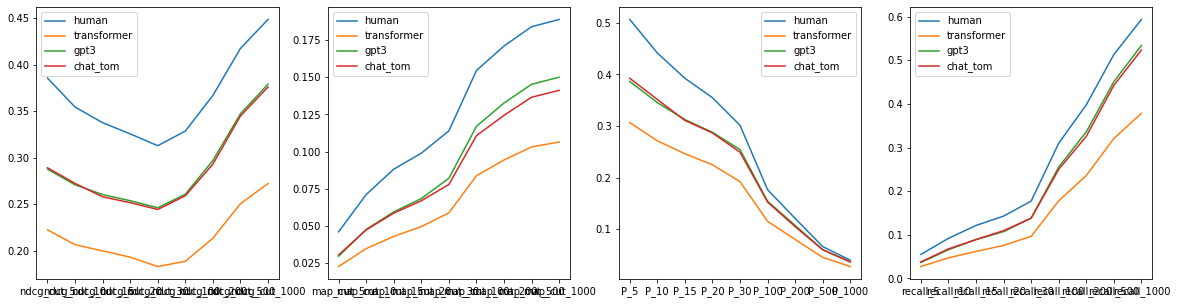

In [8]:
# create an ArgumentParser object
# parser = argparse.ArgumentParser()
# # add an argument
# parser.add_argument("--year", type=str, required=True, help="enter your name")
# parser.add_argument("--exp_name",type=str,  required=True, help="enter your name")
# parser.add_argument("--metric_column_name", type=str, default='name', help="enter your name")
# # parse the arguments
# args = parser.parse_args()


exp_name = 'gpt'
metric_column_name = 'name'

# main func
data = pd.read_csv(f'data/{year}_{exp_name}.csv')
print("data have columns:",data.columns )
data[metric_column_name] = data[metric_column_name].apply(lambda x: x.strip())
# create a list of preferred metrics
preferred_k = ['5', '10', '15', '20', '30', '100', '200', '500', '1000']
preferred_metrics1 = ['ndcg', 'map']
preferred_metrics2 = ['recall', 'P']
preferred_eval_metrics1 = [f'{metric}_cut_{k}' for metric in preferred_metrics1 for k in preferred_k]
preferred_eval_metrics2 = [f'{metric}_{k}' for metric in preferred_metrics2 for k in preferred_k]

preferred_eval_metrics = preferred_eval_metrics1 + preferred_eval_metrics2 

# create a dataframe to store the results
all_measures = pd.DataFrame(columns=list(data.columns))
for focal_metric in preferred_eval_metrics:
    all_measure_ = data[(data[metric_column_name]==focal_metric) & (data['qid']=='all')]
    all_measures = all_measures.append(all_measure_)
    all_measures.reset_index(drop=True, inplace=True)
all_measures.to_csv(f'result/{year}_{exp_name}_all.xlsx', index=False)



# plot
plot_csv_path = f'result/{year}_{exp_name}_plot.xlsx'
groups = ['ndcg', 'map', 'P','recall']
writer = pd.ExcelWriter(plot_csv_path)
fig_abs, ax_abs = plt.subplots(1, 4, figsize=(20,5))
#fig_p, ax_p = plt.subplots(1, 4, figsize=(20,5))
for group in groups:
    eval_group = []
    for eval_metric in preferred_eval_metrics:
        if eval_metric.startswith(group):
            eval_group.append(eval_metric)
    group_measures = all_measures[all_measures['name'].isin(eval_group)]
    group_measures.drop(columns='qid', inplace=True)
    method_lst = list(group_measures.columns)[1:]
    print("method_lst, ", method_lst)
    for method in method_lst:
        group_measures[method] = group_measures[method].astype(float)
    group_abs = group_measures
    #group_p = group_measures[['name', 'p_value_ttest', 'p_value_wilcoxon']]
    
    group_abs.to_excel(writer, sheet_name=f'{group}_abs', index=False)
    #group_p.to_excel(writer, sheet_name=f'{group}_p', index=False)
    
    #fig_abs.add_subplot(2,2,groups.index(group)+1)
    for method in method_lst:
        ax_abs[groups.index(group)].plot(group_abs[metric_column_name], group_abs[method], label=method)
        # ax_abs[groups.index(group)].plot(group_abs['name'], group_abs['metric_baseline'], label='baseline')
        # ax_abs[groups.index(group)].plot(group_abs['name'], group_abs['metric_ours'], label='ours')
        ax_abs[groups.index(group)].legend()
    
    # #fig_p.add_subplot(2,2,groups.index(group)+1)
    # ax_p[groups.index(group)].plot(group_p['name'], group_p['p_value_ttest'], label='t-test')
    # ax_p[groups.index(group)].plot(group_p['name'], group_p['p_value_wilcoxon'], label='wilcoxon')
    # ax_p[groups.index(group)].legend()
    # ax_p[groups.index(group)].axhline(y=0.05, color='r', linestyle=':')
writer.save()
    

In [9]:
preferred_eval_metrics = ['ndcg_cut_5', 'P_5', 'map_cut_1000', 'recall_100']

all_measures[all_measures['name'].isin(preferred_eval_metrics)]

,name,qid,human,transformer,gpt3,chat_tom
0,ndcg_cut_5,all,0.3856,0.2226,0.2878,0.2893
17,map_cut_1000,all,0.189,0.1064,0.1501,0.1412
23,recall_100,all,0.3099,0.1779,0.2554,0.2501
27,P_5,all,0.5067,0.3067,0.3865,0.3926
